In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plit
import seaborn

In [2]:
df=pd.read_csv('Height-Weight Data.csv')

In [3]:
x=df[['Height']]
y=df['Weight']

In [4]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=.75)

In [5]:
xtrain

,Height
2619,66.816255
1348,73.964493
3479,72.587375
56,68.353057
1053,67.180939
...,...
1411,69.895404
2460,69.224115
1366,68.301022
3478,69.384661


In [6]:
xtest

,Height
1248,67.919279
1121,67.177917
113,69.196858
1304,68.485725
2921,68.384387
...,...
1730,69.807275
583,65.188478
2714,70.280086
1399,71.015731


In [7]:
ytrain

2619    176.830677
1348    215.043889
3479    189.104046
56      189.710210
1053    169.829454
           ...    
1411    171.919036
2460    167.738248
1366    194.546080
3478    198.516607
1373    192.059874
Name: Weight, Length: 2625, dtype: float64

In [8]:
ytest

1248    196.447702
1121    175.352109
113     178.685546
1304    186.412945
2921    168.153561
           ...    
1730    217.189741
583     151.886942
2714    186.922284
1399    198.272094
374     165.155899
Name: Weight, Length: 876, dtype: float64

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [12]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [13]:
m=lr.coef_
m

array([5.92572362])

In [14]:
c=lr.intercept_
c

-222.0603818384956

In [16]:
x1=74.11010539
y=m*x1+c
y

array([217.09562011])

In [21]:

lr.predict([[x1]])

array([217.09562011])

In [22]:
df['predicted values'] =lr.predict(x)

In [24]:
df.head(30)

,Height,Weight,predicted values
0,73.847017,241.893563,215.536631
1,68.781904,162.310473,185.522172
2,74.110105,212.740856,217.095620
3,71.730978,220.042470,202.997571
4,69.881796,206.349801,192.039826
5,67.253016,152.212156,176.462402
6,68.785081,183.927889,185.540999
7,68.348516,167.971111,182.954031
8,67.018950,175.929440,175.075391
9,63.456494,156.399676,153.965263


In [25]:
lr.score(xtest,ytest)

0.7638422766511237

In [26]:
lr.score(xtrain,ytrain)

0.7212792849694829

In [27]:
from sklearn.metrics import mean_squared_error

In [29]:
mse=mean_squared_error(df.Weight,df['predicted values'])

In [30]:
mse

106.00515673218302

In [31]:
pred =lr.predict(xtest)
pred

array([180.41049561, 176.0173852 , 187.9810711 , 183.76709366,
       183.1665947 , 203.25098818, 153.58995681, 159.82345558,
       166.15524232, 167.89108682, 163.32371036, 179.70249501,
       161.82330026, 186.2782183 , 218.05507334, 203.22738999,
       200.10546392, 182.29887505, 186.07209396, 180.44222406,
       201.14855329, 189.74741169, 188.64205813, 163.06071893,
       214.14389854, 160.59366899, 203.39898123, 175.78410736,
       171.31034253, 184.02064358, 181.06787358, 191.55726018,
       192.39393638, 198.96772374, 179.52172548, 187.78630062,
       202.11803438, 178.76735028, 203.57117061, 177.64607437,
       181.64480991, 201.07162981, 209.41470379, 183.44170536,
       184.97078946, 176.57261804, 186.53652445, 162.4623435 ,
       180.18105106, 190.26154116, 181.47772151, 156.84979936,
       195.76117135, 187.25596709, 161.49545355, 173.04083776,
       176.50350923, 138.34373184, 193.19841938, 218.33874733,
       162.80675065, 184.86668789, 182.62296739, 167.02

In [32]:
mse=mean_squared_error(ytest,pred)
mse

96.88488553483629

In [33]:
pred2=lr.predict(xtrain)
pred2

array([173.87428059, 216.23276352, 208.07233961, ..., 182.67259853,
       189.09394232, 180.70255177])

In [35]:
mse=mean_squared_error(ytrain,pred2)
mse

109.04872152032617

Text(0.5, 1.0, 'Height and Weight Data')

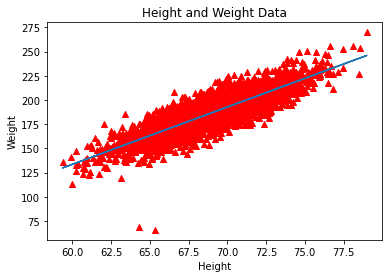

In [36]:
plit.plot(df.Height, lr.predict(x))
plit.scatter(df.Height,df.Weight,color = 'red',marker='^')
plit.xlabel('Height')
plit.ylabel('Weight')
plit.title('Height and Weight Data')

In [37]:
df.Height.mean()

69.02441087268797

In [39]:
df.Weight.mean()

186.89125797946284